In [34]:
import sys
sys.path.append("../")

In [35]:
%reload_ext autoreload
%autoreload 2

In [36]:
import matplotlib.pyplot as plt

from datasets.tum import TUMRGBDDataset

In [37]:
dataset_path = "/scratch/saksham/data/tum/rgbd_dataset_freiburg1_desk/"

In [38]:
dataset = TUMRGBDDataset(dataset_path)

In [39]:
index = 56

In [40]:
rgb = dataset[index][0]
depth = dataset[index][1]

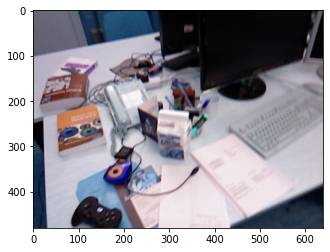

In [41]:
plt.imshow(rgb)

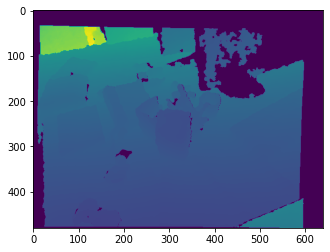

In [42]:
plt.imshow(depth/depth.max())

In [43]:
depths = []

for i in range(len(dataset)):
    depths.append(dataset[i][1])

In [44]:
import numpy as np
depths = np.stack(depths, axis = 0)

In [45]:
depths = depths.flatten()/5000

In [46]:
depths = depths[depths>0]

In [47]:
np.percentile(depths.flatten(), 99.9)

3.8844

In [48]:
np.percentile(depths.flatten(), 0.1)

0.4482

### Preprocessing

In [24]:
import cv2

depth2 = (depth/256).astype('uint8')
mask = (((depth2 == 0)).astype('int')*255).astype('uint8')
dst = cv2.inpaint(depth2, mask, 3, cv2.INPAINT_TELEA)

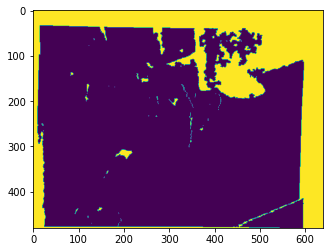

In [25]:
plt.imshow(mask) #mask - yellow pixels to fill

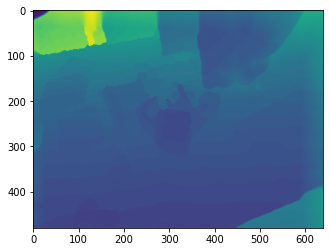

In [26]:
plt.imshow(dst) #inpainted_depth

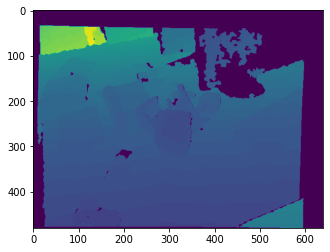

In [27]:
plt.imshow(depth2) #original_depth

In [31]:
# convert t0 metric space
depth3 = dst*256/5000

In [32]:
np.percentile(depth3, 0.1)

0.3584

In [33]:
np.percentile(depth3, 99.9)

3.2768